In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [69]:
ticker = ['EURUSD=X','GBPUSD=X','USDCAD=X','USDJPY=X']

df = yf.download(ticker, start='2016-01-01', end='2020-01-01')
df

[*********************100%%**********************]  4 of 4 completed


Adj Close                                    Close            \
            EURUSD=X  GBPUSD=X USDCAD=X    USDJPY=X  EURUSD=X  GBPUSD=X   
Date                                                                      
2016-01-01  1.085906  1.473839  1.38997  120.288002  1.085906  1.473839   
2016-01-04  1.085399  1.473709  1.38645  120.310997  1.085399  1.473709   
2016-01-05  1.082755  1.471410  1.39343  119.467003  1.082755  1.471410   
2016-01-06  1.075199  1.467394  1.39840  119.101997  1.075199  1.467394   
2016-01-07  1.077900  1.462994  1.40676  118.610001  1.077900  1.462994   
...              ...       ...      ...         ...       ...       ...   
2019-12-25  1.109016  1.293494  1.31640  109.383003  1.109016  1.293494   
2019-12-26  1.109545  1.297353  1.31550  109.369003  1.109545  1.297353   
2019-12-27  1.110112  1.300221  1.31080  109.542000  1.110112  1.300221   
2019-12-30  1.118230  1.309192  1.30734  109.428001  1.118230  1.309192   
2019-12-31  1.120230  1.311303  1.30606  108.873001  1.120230  1.311303   

                                     High            ...      Low              \
           USDCAD=X    USDJPY=X  EURUSD=X  GBPUSD=X  ... USDCAD=X    USDJPY=X   
Date                                                 ...                        
2016-01-01  1.38997  120.288002  1.086697  1.473839  ...  1.38322  120.288002   
2016-01-04  1.38645  120.310997  1.094600  1.481701  ...  1.38480  118.720001   
2016-01-05  1.39343  119.467003  1.084105  1.472971  ...  1.38960  118.801003   
2016-01-06  1.39840  119.101997  1.077203  1.467998  ...  1.39790  118.260002   
2016-01-07  1.40676  118.610001  1.087600  1.464343  ...  1.40520  117.363998   
...             ...         ...       ...       ...  ...      ...         ...   
2019-12-25  1.31640  109.383003  1.110864  1.298700  ...  1.31500  109.309998   
2019-12-26  1.31550  109.369003  1.110494  1.301575  ...  1.31125  109.366997   
2019-12-27  1.31080  109.542000  1.118068  1.311819  ...  1.30723  109.426003   
2019-12-30  1.30734  109.428001  1.122070  1.315270  ...  1.30530  108.773003   
2019-12-31  1.30606  108.873001  1.124101  1.328198  ...  1.29531  108.469002   

                Open                                  Volume           \
            EURUSD=X  GBPUSD=X USDCAD=X    USDJPY=X EURUSD=X GBPUSD=X   
Date                                                                    
2016-01-01  1.085906  1.473839  1.38997  120.288002        0        0   
2016-01-04  1.085505  1.473991  1.38737  120.317001        0        0   
2016-01-05  1.082603  1.471454  1.39363  119.473999        0        0   
2016-01-06  1.075199  1.467696  1.39874  119.099998        0        0   
2016-01-07  1.077795  1.462929  1.40660  118.609001        0        0   
...              ...       ...      ...         ...      ...      ...   
2019-12-25  1.109139  1.293494  1.31660  109.379997        0        0   
2019-12-26  1.109509  1.297185  1.31530  109.373001        0        0   
2019-12-27  1.110124  1.300289  1.31099  109.538002        0        0   
2019-12-30  1.118155  1.309140  1.30743  109.438004        0        0   
2019-12-31  1.120448  1.311648  1.30580  108.867996        0        0   

                              
           USDCAD=X USDJPY=X  
Date                          
2016-01-01        0        0  
2016-01-04        0        0  
2016-01-05        0        0  
2016-01-06        0        0  
2016-01-07        0        0  
...             ...      ...  
2019-12-25        0        0  
2019-12-26        0        0  
2019-12-27        0        0  
2019-12-30        0        0  
2019-12-31        0        0  

[1040 rows x 24 columns]

In [70]:
df=df.drop(['High','Open','Low','Adj Close','Volume'],axis=1)
df

Close                               
            EURUSD=X  GBPUSD=X USDCAD=X    USDJPY=X
Date                                               
2016-01-01  1.085906  1.473839  1.38997  120.288002
2016-01-04  1.085399  1.473709  1.38645  120.310997
2016-01-05  1.082755  1.471410  1.39343  119.467003
2016-01-06  1.075199  1.467394  1.39840  119.101997
2016-01-07  1.077900  1.462994  1.40676  118.610001
...              ...       ...      ...         ...
2019-12-25  1.109016  1.293494  1.31640  109.383003
2019-12-26  1.109545  1.297353  1.31550  109.369003
2019-12-27  1.110112  1.300221  1.31080  109.542000
2019-12-30  1.118230  1.309192  1.30734  109.428001
2019-12-31  1.120230  1.311303  1.30606  108.873001

[1040 rows x 4 columns]

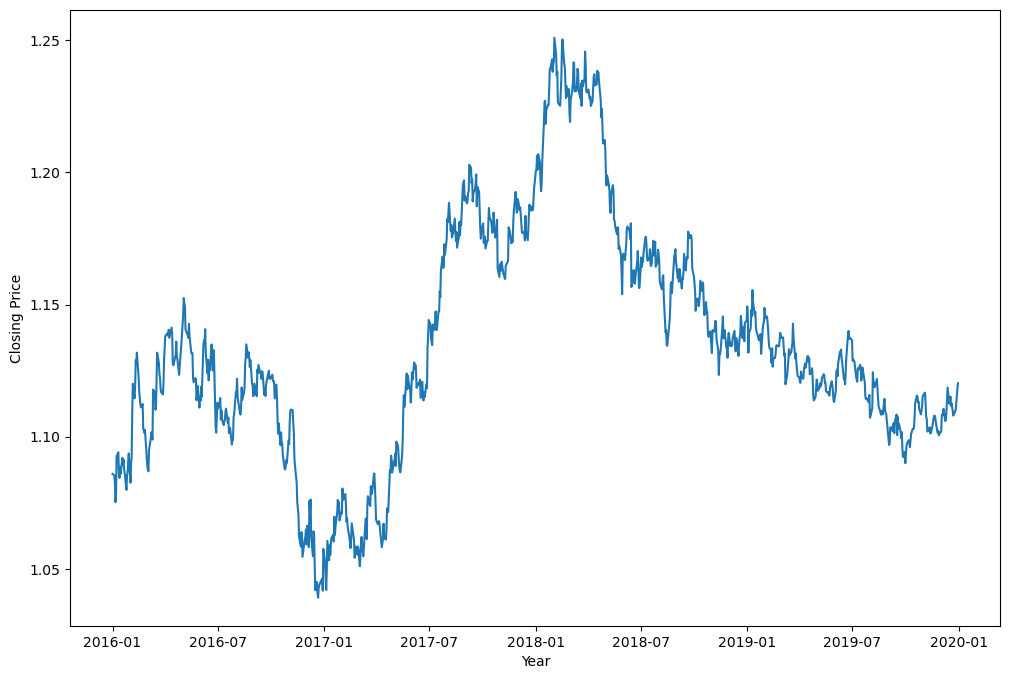

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.index, df['Close']['EURUSD=X'], label='EURUSD=X')

ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')

plt.show()

standard deviation

roc

hurst exponent and incorporating different strategies

risk management by capital allocation

trailing stop loss

# Note

Follwing cell consists of a function which returns the daily portfolio value of strategies by taking buy and sell prices as inputs. 

It incorporates the feature of opening multiple positions at the same time and averages out the buy/sell prices in that order.

In [73]:
def capx(dfv,buy_price,sell_price,cap,lot,string):
    capital=[100000]
    df=dfv['Close'][string]
    df=df.to_frame(name='Close')
    
    df['buy_price']=buy_price
    df['sell_price']=sell_price
    buyx=0
    sellx=0
    buypx=0
    sellpx=0
    buyp=0
    sellp=0
    pos_type=[]
    for i in range(len(df)):
        if not pd.isna(df['buy_price'][i]):
            if sellx==1:                       #closing sell position
                capital.append(capital[-1])
                sellx=0
                sellpx=0
                sellp=0
                pos_type.append("close")
                cap=capital[-1]
            else:                              #opening buy position
                capital.append(capital[-1])
                buypx=buypx+1
                if buypx==1:
                    buyp=df['Close'][i]
                    cap=cap-(buyp*lot)
                    buyx=1
                elif buypx>1 :                           #to keep count of more than 1 positions
                    buyp=(buyp+df['Close'][i])
                    cap=cap-(buyp*lot/buypx)
                    buyx=1
                pos_type.append("open")
                
            
        elif not pd.isna(df['sell_price'][i]):
            if buyx==1:
                capital.append(capital[-1])
                buyx=0
                buypx=0
                buyp=0
                pos_type.append("close")
                cap=capital[-1]
            else:
                capital.append(capital[-1])
                sellpx=sellpx+1
                if sellpx==1:
                    sellp=df['Close'][i]
                    cap=cap+(sellp*lot)
                    sellx=1
                elif sellpx>1:
                    sellp=(sellp+df['Close'][i])
                    cap=cap+(sellp*lot/sellpx)
                    sellx=1
                pos_type.append("open")
            
        elif buyx==1:
            capital.append(cap+(df['Close'][i]*lot*buypx))
            pos_type.append(np.nan)
        elif sellx==1:
            capital.append(cap-(df['Close'][i]*lot*sellpx))
            pos_type.append(np.nan)
        else:
            capital.append(capital[-1])
            cap=capital[-1]
            pos_type.append(np.nan)
    del capital[0]
    return capital,pos_type

In [131]:
from ta.trend import PSARIndicator

class strategy:
    
    def __init__(self,data):
        self.dfv=data
    
    def strat_std_dev(self,string):
        df=self.dfv['Close'][string]
        df=df.to_frame(name='Close')
        
        signal=[]
        signall = 0
        signals = 0
        buy_price=[]
        sell_price=[]
        position=[]
        
        for i in range(len(df)):
            if i>4:
                data1 = [df['Close'][i],df['Close'][i-1]]
                data2 = [df['Close'][i-2],df['Close'][i-3],df['Close'][i-4]]
                if (np.mean(data1)) > (np.mean(data2))+(2*(np.std(data2))):
                    if signall!=1:
                        signal.append(1)
                        signall=1
                        signals=0
                        buy_price.append(df['Close'][i])
                        sell_price.append(np.nan)
                        position.append("long")
                    else:
                        signal.append(0)
                        buy_price.append(np.nan)
                        sell_price.append(np.nan)
                        position.append(np.nan)
                elif (np.mean(data1)) < (np.mean(data2))+(2*(np.std(data2))):
                    if signals!=-1:
                        signal.append(-1)
                        signals=-1
                        signall=0
                        buy_price.append(np.nan)
                        sell_price.append(df['Close'][i])
                        position.append("short")
                    else:
                        signal.append(0)
                        buy_price.append(np.nan)
                        sell_price.append(np.nan)
                        position.append(np.nan)
                else:
                    signall=0
                    signals=0
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            else:
                signal.append(0)
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                position.append(np.nan)
                
        return signal,buy_price,sell_price,position

    def strat_roc(self,string):
        df=dfv['Close'][string]
        df=df.to_frame(name='Close')
    
        signal=[]
        signall = 0
        signals = 0
        buy_price=[]
        sell_price=[]
        position=[]
        
        df['roc']=df['Close'].pct_change()
        
        for i in range(len(df)):
            if df['roc'][i] > 0.0075:
                if signall!=1:
                    signal.append(1)
                    signall=1
                    signals=0
                    buy_price.append(df['Close'][i])
                    sell_price.append(np.nan)
                    position.append("long")
                else:
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            elif df['roc'][i] <0.0085:
                if signals!=-1:
                    signal.append(-1)
                    signals=-1
                    signall=0
                    buy_price.append(np.nan)
                    sell_price.append(df['Close'][i])
                    position.append("short")
                else:
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            else:
                signall=0
                signals=0
                signal.append(0)
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                position.append(np.nan)
                
        return signal,buy_price,sell_price,position
    
    def strat_sma_dev(self,lookback1,string):
        df=dfv['Close'][string]
        df=df.to_frame(name='Close')
        
        signal=[]
        signall = 0
        signals = 0
        buy_price=[]
        sell_price=[]
        position=[]
        
        df['sma']=df['Close'].rolling(lookback1).mean()
        for i in range(len(df)):
            if df['Close'][i] > .985*df['sma'][i]:
                if signall!=1:
                    signal.append(1)
                    signall=1
                    signals=0
                    buy_price.append(df['Close'][i])
                    sell_price.append(np.nan)
                    position.append("long")
                else:
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            elif df['Close'][i] < 1.015*df['sma'][i]:
                if signals!=-1:
                    signal.append(-1)
                    signals=-1
                    signall=0
                    buy_price.append(np.nan)
                    sell_price.append(df['Close'][i])
                    position.append("short")
                else:
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            else:
                signall=0
                signals=0
                signal.append(0)
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                position.append(np.nan)
                
        return signal,buy_price,sell_price,position
    
    def strat_psar(self,string):
        df=dfv['Close'][string]
        df=df.to_frame(name='Close')
        
        psar_indicator=PSARIndicator(df.High, df.Low, df.Close,step= 0.02, max_step=0.2)
        df['psar']=psar_indicator.psar()        
        
        signal=[]
        signall = 0
        signals = 0
        buy_price=[]
        sell_price=[]
        position=[]
        
        for i in range(len(df)):
            if df['Close'][i] > df['psar'][i]:
                if signall!=1:
                    signal.append(1)
                    signall=1
                    signals=0
                    buy_price.append(df['Close'][i])
                    sell_price.append(np.nan)
                    position.append("long")
                else:
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            elif df['Close'][i] < df['psar'][i]:
                if signals!=-1:
                    signal.append(-1)
                    signals=-1
                    signall=0
                    buy_price.append(np.nan)
                    sell_price.append(df['Close'][i])
                    position.append("short")
                else:
                    signal.append(0)
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    position.append(np.nan)
            else:
                signall=0
                signals=0
                signal.append(0)
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                position.append(np.nan)
                
        return signal,buy_price,sell_price,position

In [132]:
#Generating and Storing Signals#

x=strategy(df)
signal1,buy_price1,sell_price1,position1= x.strat_std_dev('EURUSD=X')
signal2,buy_price2,sell_price2,position2= x.strat_std_dev('GBPUSD=X')
signal3,buy_price3,sell_price3,position3= x.strat_std_dev('USDCAD=X')
signal4,buy_price4,sell_price4,position4= x.strat_std_dev('USDJPY=X')

To show how Buy and Sell signals are coming to play on the ticker.

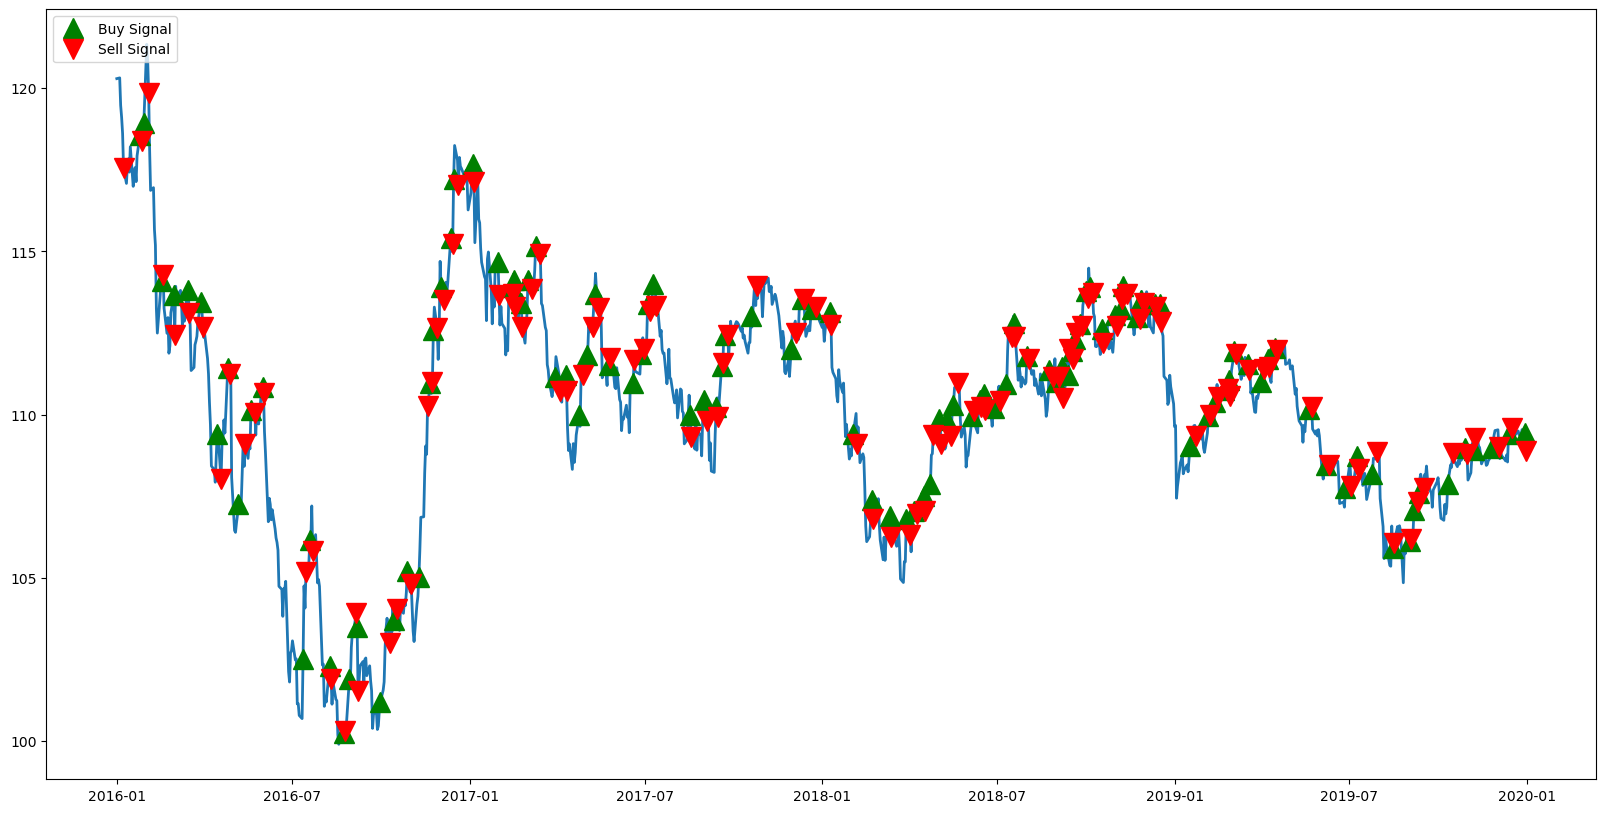

In [133]:
df4=df['Close']['USDJPY=X']
df4=df4.to_frame(name='Close')

df4['signal']=signal4
df4['buy_price']=buy_price4
df4['sell_price']=sell_price4
df4['position']=position4

plt.figure(figsize=(20,10))

plt.plot(df4['Close'], linewidth = 2)
plt.plot(df4.index, buy_price4, marker = '^', color = 'green', markersize = 15, linewidth = 0, label = 'Buy Signal')
plt.plot(df4.index, sell_price4, marker = 'v', color= 'r', markersize = 15, linewidth = 0, label = 'Sell Signal')
plt.legend(loc = 'upper left')
plt.show()

In [134]:
#Storing the daily portfolio values

capital1,pos_type1=capx(df,buy_price1,sell_price1,100000,100000,'EURUSD=X')
capital2,pos_type2=capx(df,buy_price2,sell_price2,100000,100000,'GBPUSD=X')
capital3,pos_type3=capx(df,buy_price3,sell_price3,100000,100000,'USDCAD=X')
capital4,pos_type4=capx(df,buy_price4,sell_price4,100000,1000,'USDJPY=X')

In [135]:
capitalx=[]
for i in range(len(df)):
    capitalx.append(capital1[i]+capital2[i]+capital3[i]+capital4[i])

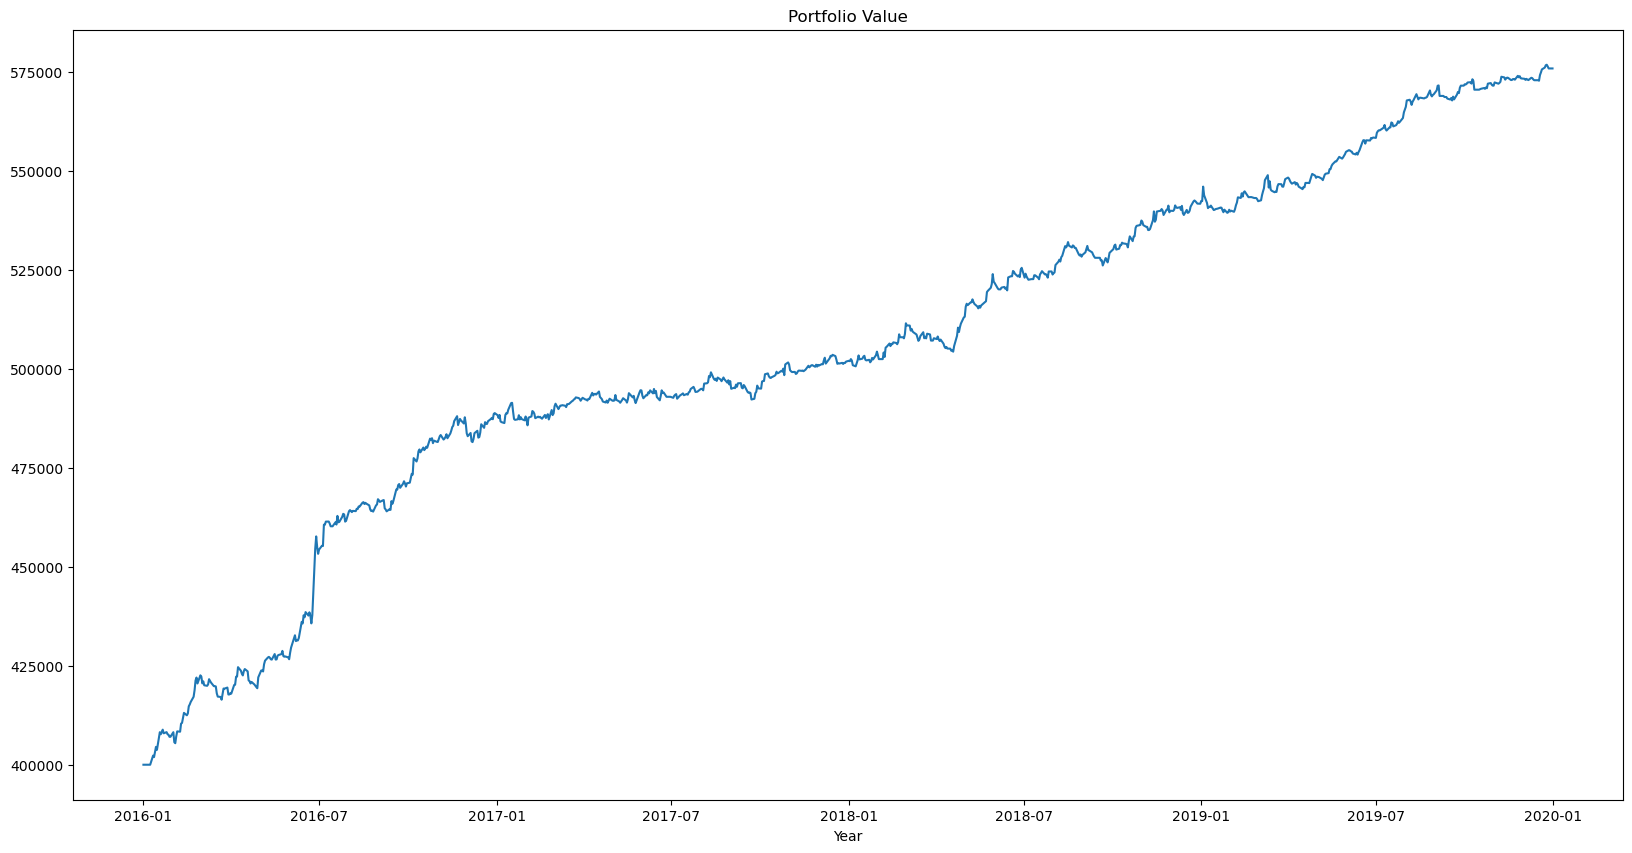

In [136]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df.index, capitalx)

ax.set_xlabel('Year')
plt.title("Portfolio Value")

plt.show()

# Note

So now we have gathered the total portfolio value on a daily basis. We started with a capital of 400000 and have reached a value of 575823 signifying returns close to 44%.

This was based on a single strategy based on Standard Deviation.

Now we will incorporate multiple strategies.

We will now introduce a new parameter called Hurst Exponent, which will help us to give a better analysis. We will use this to switch between different strategies, to generate better results.

The Hurst Exponent uses the variance of log prices to analyse whether the price is trending, mean reverting or is following complete random behaiour.

Hurst Exponent ranges between 0 and 1. 

    Hurst Exponent  values =>     (0,0.5)  -  Price is mean reverting
                               
                                   0.5     -  Price moves are random
                              
                                  (0.5,1)  -  Price is in a trend
                                  
For values of Hurst => 
                       
                       (0, 0.2) - SMA Deviation
                       
                       (0.2, 0.4) - ROC
                       
                       (0.6, 0.8) - PSAR
                       
                       (0.8, 1) - Standard Deviation

In [137]:
from hurst import compute_Hc

def hurst_exp(x):
    H,c,data = compute_Hc(x,kind='price',simplified=True)
    return H

hurst = df['Close'].rolling(window=100).apply(hurst_exp, raw=False)

In [138]:
hurst

,EURUSD=X,GBPUSD=X,USDCAD=X,USDJPY=X
Date,,,,
2016-01-01,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-25,0.453327,0.766695,0.362482,0.524832
2019-12-26,0.407768,0.692266,0.384767,0.515603
2019-12-27,0.353337,0.699083,0.329143,0.517742


In [ ]:
def strategy(df,hurst,string):
    
    signal=[]
    signall = 0
    signals = 0
    buy_price=[]
    sell_price=[]
    position=[]
    
    for i in range(len(df)):
        if df['Close'][i] > df['psar'][i]:
            if signall!=1:
                signal.append(1)
                signall=1
                signals=0
                buy_price.append(df['Close'][i])
                sell_price.append(np.nan)
                position.append("long")
            else:
                signal.append(0)
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                position.append(np.nan)
        elif df['Close'][i] < df['psar'][i]:
            if signals!=-1:
                signal.append(-1)
                signals=-1
                signall=0
                buy_price.append(np.nan)
                sell_price.append(df['Close'][i])
                position.append("short")
            else:
                signal.append(0)
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                position.append(np.nan)
        else:
            signall=0
            signals=0
            signal.append(0)
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            position.append(np.nan)
    
    for i in range(len(hurst)):
        